In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load  
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data_to_load)
ride_df=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
complete_df=pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the data table for preview
complete_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
complete_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [3]:
# Sort by city type

urban = complete_df[complete_df["type"] == "Urban"]
suburban = complete_df[complete_df["type"] == "Suburban"]
rural = complete_df[complete_df["type"] == "Rural"]

urban.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
# Obtain the x and y coordinates for each of the three city types-driver count
u_count_driver = urban.groupby(["city"])["driver_count"].mean()
s_count_driver = suburban.groupby(["city"])["driver_count"].mean()
r_count_driver = rural.groupby(["city"])["driver_count"].mean()

u_count_driver.head()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

In [5]:
# Obtain the x and y coordinates for each of the three city types-rides
u_count = urban.groupby(["city"])["ride_id"].count()
s_count = suburban.groupby(["city"])["ride_id"].count()
r_count = rural.groupby(["city"])["ride_id"].count()

u_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [6]:
# Obtain the x and y coordinates for each of the three city types-fare

u_fare = urban.groupby(["city"])["fare"].mean()
s_fare = suburban.groupby(["city"])["fare"].mean()
r_fare = rural.groupby(["city"])["fare"].mean()

u_fare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

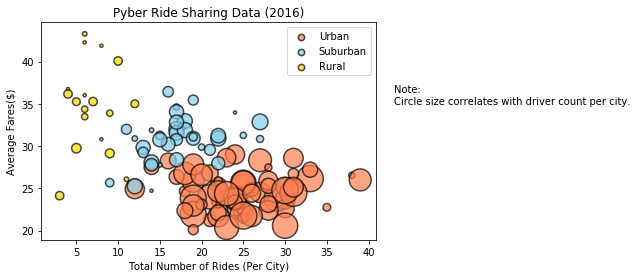

In [7]:
# Build the scatter plots for each city types - experiment with edgecolor, linewidths and alpha!

plt.scatter(u_count, 
            u_fare,
            s=10*u_count_driver,
            c="coral", 
            edgecolor="black", linewidths=1.5, marker="o", 
            alpha=0.7, label="Urban")
    
plt.scatter(s_count, 
            s_fare,
            s=10*s_count_driver, 
            c="skyblue", 
            edgecolor="black", linewidths=1.5, marker="o", 
            alpha=0.7, label="Urban")

    
plt.scatter(r_count, 
            r_fare,
            s=10*r_count_driver, 
            c="gold", 
            edgecolor="black", linewidths=1.5, marker="o", 
            alpha=0.7, label="Urban")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares($)")

# Create a legend
legend=plt.legend(labels=["Urban", "Suburban", "Rural"], loc="upper right")
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

# Incorporate a text label regarding circle size
plt.text(43, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Fig1.png")

# Show Plot
plt.show()

## Total Fares by City Type

In [8]:
# Create a GroupBy object based upon type 
By_type = complete_df.groupby("type") 

# Calculate Type Percents
percentage = By_type[["fare"]].sum() 
percentage_df=pd.DataFrame(percentage)
percentage_df.head()

,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


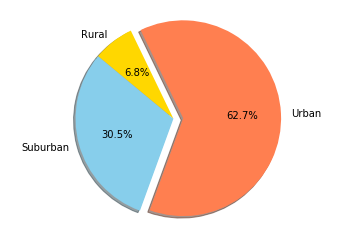

In [9]:
# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [39854.38, 4327.93, 19356.33]

# The colors of each section of the pie chart
colors = ["coral", "gold", "skyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
# Create axes which are equal so we have a perfect circle

plt.axis("equal")
# Save Figure
plt.savefig("FaresCity.png")

# Show Figure
plt.show()

## Total Rides by City Type

In [10]:
# Calculate Ride Percents
# Create a GroupBy object based upon type 
By_type = complete_df.groupby("type") 

# Calculate Type Percents
percentage_ride = By_type[["type"]].count() 
percentage_ride_df=pd.DataFrame(percentage_ride)
percentage_ride_df.head()

,type
type,
Rural,125
Suburban,625
Urban,1625


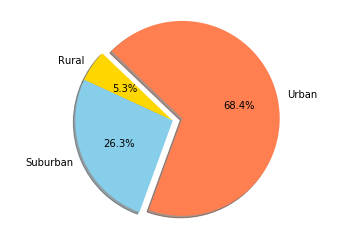

In [11]:
# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [1625, 125, 625]

# The colors of each section of the pie chart
colors = ["coral", "gold", "skyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("RidesCity.png")

# Show Figure
plt.show()

## Total Drivers by City Type

In [12]:
# Calculate Driver Percents
# Create a GroupBy object based upon type 
By_type = complete_df.groupby("type") 

# Calculate Type Percents
percentage_driver = By_type[["driver_count"]].sum() 
percentage_driver_df=pd.DataFrame(percentage_driver)
percentage_driver_df.head()

,driver_count
type,
Rural,537
Suburban,8570
Urban,59602


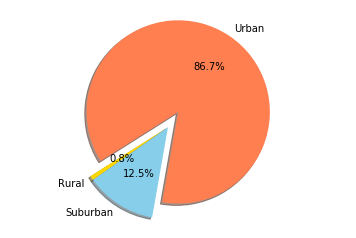

In [13]:
# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [59602, 537, 8570]

# The colors of each section of the pie chart
colors = ["coral", "gold", "skyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.2, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("DriversCity.png")

# Show Figure
plt.show()